In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('white')
palette = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
sns.set(palette = palette, font_scale=2.0, style="white", rc={"lines.linewidth": 4.0})

In [2]:
stn_names, stn_lonlat, full_data = pkl.load(open("./wind_data.p", 'rb'))

In [3]:
df = pd.read_pickle("wind_calib_df.pkl")

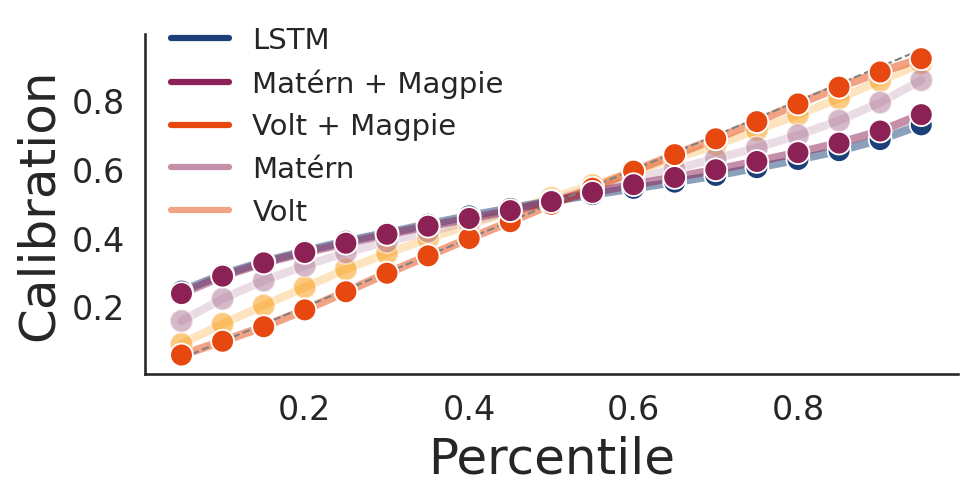

In [7]:
def PlotCalib(df, ax, title):
    
    sub_df = df[(df['Type']!='lstm') & (df['ema'] == False)]
    pal = [palette[7], palette[5]]
    sns.lineplot(x='Percentile', y="Calibration", hue='Type', data=sub_df, ax=ax, alpha=0.25, palette=pal, 
                 legend=True)
    sns.scatterplot(x='Percentile', y="Calibration", hue='Type', data=sub_df, ax=ax, s=120, legend=False, zorder=4,
                   alpha=0.5, palette=pal)
    
    sub_df = df[(df['Type']=='lstm') | (df['ema'] == True)]
    pal = [palette[0],  palette[6], palette[4]]
    sns.lineplot(x='Percentile', y="Calibration", hue='Type', data=sub_df, ax=ax, alpha=0.5,
                palette=pal, legend=True)
    sns.scatterplot(x='Percentile', y="Calibration", hue='Type', data=sub_df, ax=ax, s=120, legend=False, zorder=4,
                   palette=pal)
    x = np.linspace(0.05,0.95)
    y = np.linspace(0, len(percentiles))
    ax.plot(x, x, color="gray", lw=1., ls="--")
#     ax.set_title(title)
    


from matplotlib.lines import Line2D
colors = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
fig, ax = plt.subplots(1,1,dpi=150, figsize=(7, 3))

percentiles = np.linspace(0.05, 0.95, 19)
PlotCalib(df, ax, "Wind Speed Calibration")


plt.tick_params(labelsize=16)
sns.despine()

custom_lines = [Line2D([0], [0], color=palette[0], lw=3),
               Line2D([0], [0], color=palette[4], lw=3),
               Line2D([0], [0], color=palette[6], lw=3),
               Line2D([0], [0], color=palette[4], lw=3., alpha=0.5),
               Line2D([0], [0], color=palette[6], lw=3, alpha=0.5)]


plt.legend(custom_lines, ['LSTM', r"Matérn + Magpie", "Volt + Magpie", "Matérn", "Volt"],
           loc='upper left',
           fontsize=14, frameon=False, bbox_to_anchor=(0., 1.1))
# ax.legend(fontsize=14, bbox_to_anchor=(1., 0.75))
# plt.label("Percentile")
plt.savefig("./wind_calibration.pdf", bbox_inches="tight")
plt.show()

## Theta Sensitivity

In [53]:
df = pd.read_pickle("theta_calib_df.pkl")

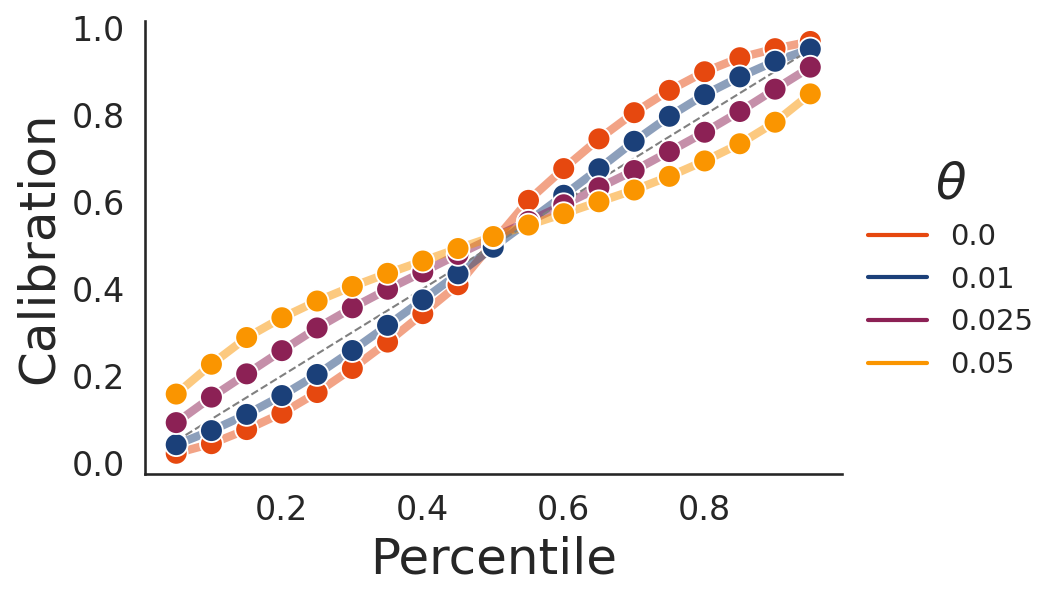

In [54]:
def PlotCalib(df, ax, title):
#     pal = [palette[6], palette[0], palette[4]]
#     sns.lineplot(x='Percentile', y="Calibration", hue='Type', data=df, ax=ax, alpha=0.25,
#                 palette=pal, legend=False)
#     sns.scatterplot(x='Percentile', y="Calibration", hue='Type', data=df, ax=ax, s=120, legend=False, zorder=4,
#                    palette=pal, alpha=0.5)


    pal = [palette[6], palette[0], palette[4], palette[7]]
    sns.lineplot(x='Percentile', y="Calibration", hue='theta', data=df, ax=ax, alpha=0.5,
                palette=pal, legend=True)
    sns.scatterplot(x='Percentile', y="Calibration", hue='theta', data=df, ax=ax, s=120, legend=False, zorder=4,
                   palette=pal)
    x = np.linspace(0.05,0.95)
    y = np.linspace(0, len(percentiles))
    ax.plot(x, x, color="gray", lw=1., ls="--")
#     ax.set_title(title)


from matplotlib.lines import Line2D
colors = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
fig, ax = plt.subplots(1,1,dpi=150, figsize=(6, 4))

percentiles = np.linspace(0.05, 0.95, 19)
PlotCalib(df, ax, "Wind Speed Mean Reversion")


plt.tick_params(labelsize=16)
sns.despine()

custom_lines = [Line2D([0], [0], color=palette[6], lw=2),
                Line2D([0], [0], color=palette[0], lw=2),
                Line2D([0], [0], color=palette[4], lw=2),
               Line2D([0], [0], color=palette[7], lw=2)]


legend = plt.legend(custom_lines,['0.0', "0.01", "0.025", "0.05"], 
           fontsize=14, frameon=False, bbox_to_anchor=(1., 0.75))
legend.set_title(r'$\theta$')
# ax.legend(fontsize=14, bbox_to_anchor=(1., 0.75))
# plt.label("Percentile")
plt.savefig("./theta_sensitivity.pdf", bbox_inches="tight")
plt.show()

## EMA Calibration

In [55]:
df = pd.read_pickle("ema_calibration.pkl")

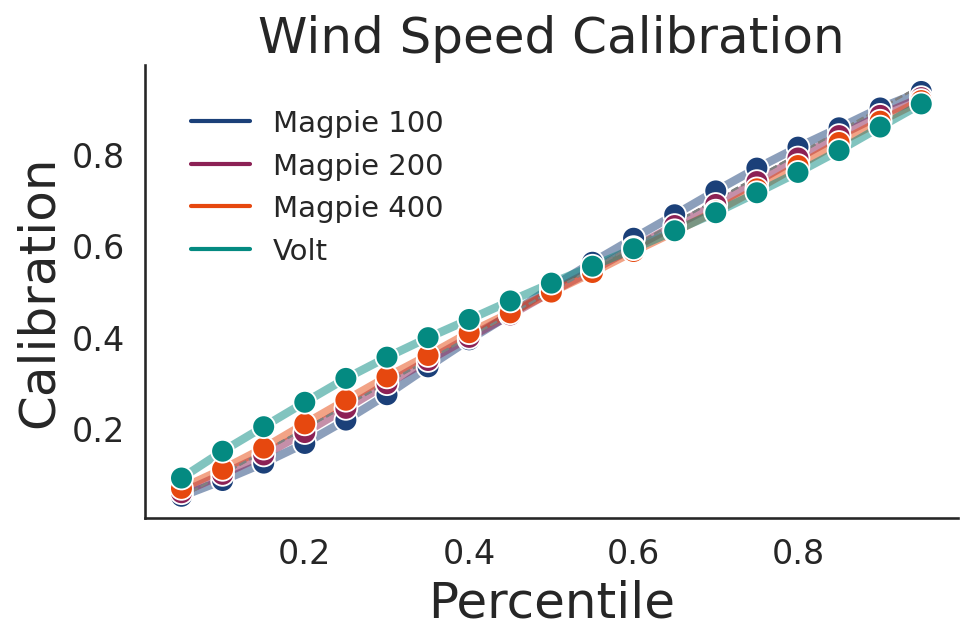

In [60]:
def PlotCalib(df, ax, title):
    sub_df = df[(df['ema']==True) & (df['k']!=50)]
    pal = [palette[0], palette[4], palette[6]]
    sns.lineplot(x='Percentile', y="Calibration", hue='k', data=sub_df, ax=ax, alpha=0.5,
                palette=pal, legend=True)
    sns.scatterplot(x='Percentile', y="Calibration", hue='k', data=sub_df, ax=ax, s=120, legend=False, zorder=4,
                   palette=pal)
    x = np.linspace(0.05,0.95)
    y = np.linspace(0, len(percentiles))
    ax.plot(x, x, color="gray", lw=1., ls="--")
    ax.set_title(title)
    
    
    pal = [palette[2]]
    sub_df = df[df['ema']==False]
    sns.lineplot(x='Percentile', y="Calibration", hue='Type', data=sub_df, ax=ax, alpha=0.5,
                palette=pal, legend=True)
    sns.scatterplot(x='Percentile', y="Calibration", hue='Type', data=sub_df, ax=ax, s=120, legend=False, zorder=4,
                   palette=pal)
    x = np.linspace(0.05,0.95)
    y = np.linspace(0, len(percentiles))
    ax.plot(x, x, color="gray", lw=1., ls="--")
#     ax.set_title(title)


from matplotlib.lines import Line2D
colors = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
fig, ax = plt.subplots(1,1,dpi=150, figsize=(7, 4))

percentiles = np.linspace(0.05, 0.95, 19)
PlotCalib(df, ax, "Wind Speed Calibration")


plt.tick_params(labelsize=16)
sns.despine()

custom_lines = [Line2D([0], [0], color=palette[0], lw=2),
               Line2D([0], [0], color=palette[4], lw=2),
               Line2D([0], [0], color=palette[6], lw=2),
               Line2D([0], [0], color=palette[2], lw=2)]


plt.legend(custom_lines, ['Magpie 100', r"Magpie 200", "Magpie 400", 'Volt'],
           fontsize=14, frameon=False, bbox_to_anchor=(0.4, 0.5))
# ax.legend(fontsize=14, bbox_to_anchor=(1., 0.75))
# plt.label("Percentile")
plt.savefig("./ema-wind-calibration.pdf", bbox_inches="tight")
plt.show()